In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('galactic_center/gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('galactic_center/gc_msx_e.fits'))[0]

Text(0.5, 1.0, 'MSX band E')

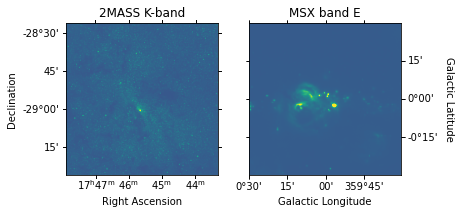

In [2]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS K-band')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')

In [3]:
from reproject import reproject_interp
array, footprint = reproject_interp(hdu2, hdu1.header)

Text(0.5, 1.0, 'MSX band E image footprint')

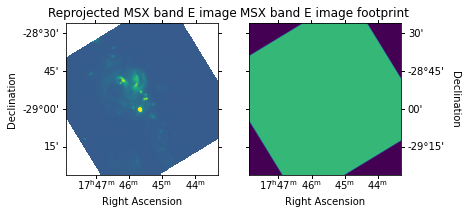

In [4]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected MSX band E image')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('MSX band E image footprint')

In [5]:
import astropy.units as u

from astropy.utils import data

from spectral_cube import SpectralCube

fn = data.get_pkg_data_filename('tests/data/example_cube.fits', 'spectral_cube')

cube = SpectralCube.read(fn)

print(cube)

SpectralCube with shape=(7, 4, 3) and unit=Jy / beam:
 n_x:      3  type_x: RA---ARC  unit_x: deg    range:    52.231466 deg:   52.231544 deg
 n_y:      4  type_y: DEC--ARC  unit_y: deg    range:    31.243639 deg:   31.243739 deg
 n_s:      7  type_s: VRAD      unit_s: m / s  range:    14322.821 m / s:   14944.909 m / s


In [9]:
sl = cube[:, 2, :]
print(sl.wcs)
print(sl.to_value())

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA'  'VRAD'  
CRVAL : 52.23158333333  7000.0  
CRPIX : 0.0  77.62811279297  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -3.333333343121e-05  -103.6813929677  
NAXIS : 0  0
[[-0.00493878 -0.00575357 -0.00786909]
 [ 0.01704574  0.01642643  0.01431908]
 [ 0.00650885  0.00880597  0.01062183]
 [ 0.00166061  0.00261821  0.00288139]
 [ 0.00532007  0.00635753  0.00609776]
 [ 0.00376035  0.00496564  0.00357377]
 [-0.00621962 -0.00428498 -0.00225733]]


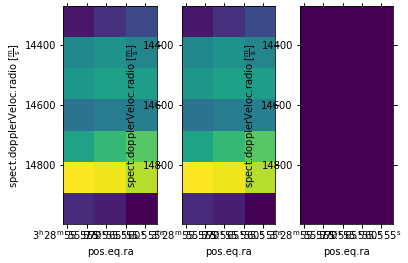

In [10]:
sl_reproj, fp = reproject_interp((sl.to_value(), sl.wcs), sl.wcs, shape_out=sl.shape, return_footprint=True)
ax1 = plt.subplot(131, projection=sl.wcs)
ax1.imshow(sl.to_value(), origin='lower')
ax2 = plt.subplot(132, projection=sl.wcs)
ax2.imshow(sl_reproj, origin='lower')
ax3 = plt.subplot(133, projection=sl.wcs)
ax3.imshow(fp, origin='lower')